In [117]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
# Import data from CSV and determine shape
df_spot = pd.read_csv("high_popularity_spotify_data.csv")
df_spot.shape

(1686, 29)

In [119]:
# Show the first 5 rows to get a general understanding of the format
df_spot.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [120]:
# Check that the two variables I want to test are integers rather than strings
df_spot.duration_ms.dtypes

dtype('int64')

In [121]:
df_spot.track_popularity.dtypes

dtype('int64')

In [122]:
# Check how the column headings are spelled and formatted
df_spot.columns.tolist()

['energy',
 'tempo',
 'danceability',
 'playlist_genre',
 'loudness',
 'liveness',
 'valence',
 'track_artist',
 'time_signature',
 'speechiness',
 'track_popularity',
 'track_href',
 'uri',
 'track_album_name',
 'playlist_name',
 'analysis_url',
 'track_id',
 'track_name',
 'track_album_release_date',
 'instrumentalness',
 'track_album_id',
 'mode',
 'key',
 'duration_ms',
 'acousticness',
 'id',
 'playlist_subgenre',
 'type',
 'playlist_id']

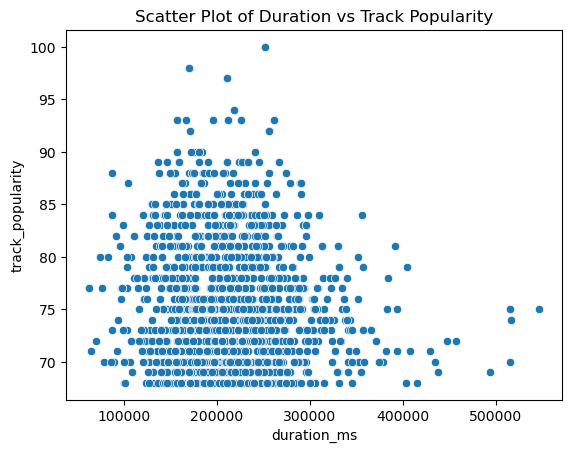

In [123]:
# Visualize the data to see if there is any obvious relationship
sns.scatterplot(data=df_spot, x='duration_ms', y='track_popularity')
plt.title('Scatter Plot of Duration vs Track Popularity')
plt.show()

In [124]:
# Prepare the data
X = df_spot[['duration_ms']]  # Independent variable
Y = df_spot['track_popularity']  # Dependent variable

In [125]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

In [126]:
# Train the model
model.fit(X_train, Y_train)

# Make predictions
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 33.9558420571884
R-squared: 0.0037059481808009442


In [142]:
# The R-squared makes it clear that model explains less than 1% of the variance in track popularity. 

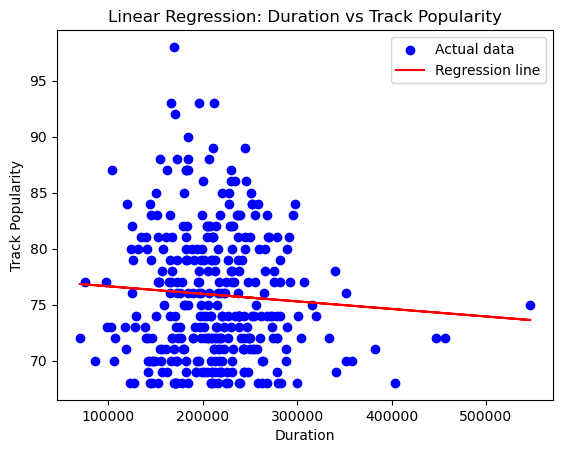

In [144]:
# Visualize the results
plt.scatter(X_test, Y_test, color='blue', label='Actual data')
plt.plot(X_test, Y_pred, color='red', label='Regression line')
plt.xlabel('Duration')
plt.ylabel('Track Popularity')
plt.title('Linear Regression: Duration vs Track Popularity')
plt.legend()
plt.show()

In [128]:
#From the initial visualization, it was obvious that there wasn't going to be a clear relationship between duration and popularity. 
#This contradicts my initial assumptions, with the regression analysis even showing a negative relationship.
#A different variable must account for the popularity of different tracks.